In [1]:
import os
import json
import pyqg_subgrid_experiments as pse
from pyqg_subgrid_experiments.models import ProbabilisticCNN
import argparse
%load_ext autoreload
%autoreload 2

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
parser = argparse.ArgumentParser()
parser.add_argument('--train_set', type=str, default="/scratch/zanna/data/pyqg/data/train/*.nc")
parser.add_argument('--test_set', type=str, default="/scratch/zanna/data/pyqg/data/test/*.nc")
parser.add_argument('--transfer_set', type=str, default="/scratch/zanna/data/pyqg/data/transfer/*.nc")
parser.add_argument('--save_dir', type=str, default="PCNN")
parser.add_argument('--inputs', type=str, default="u,v,q")
parser.add_argument('--targets', type=str, default="q_forcing_advection")
parser.add_argument('--zero_mean', type=int, default=1)
parser.add_argument('--num_epochs', type=int, default=50)
parser.add_argument('--layerwise_inputs', type=int, default=0)
parser.add_argument('--layerwise_targets', type=int, default=0)
args = parser.parse_args("")

In [4]:
train = pse.Dataset(args.train_set)

In [5]:
save_dir = 'PCNN'
test_dir = os.path.join(save_dir, "test")
xfer_dir = os.path.join(save_dir, "transfer")
#os.system(f"rm -r {save_dir}")
for d in [save_dir, test_dir, xfer_dir]:
    os.system(f"mkdir -p {d}") 

In [6]:
with open(f"{save_dir}/model_config.json", 'w') as f:
    f.write(json.dumps(args.__dict__))

In [7]:
param = pse.CNNParameterization.train_on(train, save_dir,
            inputs=args.inputs.split(","),
            targets=args.targets.split(","),
            layerwise_inputs=False,
            layerwise_targets=False,
            zero_mean=args.zero_mean,
            num_epochs=50,
            model_class=ProbabilisticCNN,
            learning_rate=0.0001)

Current mode: True
Mode after eval(): True
Gauss Loss after Epoch 1: -0.1431422718526686, equiv MSE: 0.2762954420124905, remaining min:25.33678336540858
Gauss Loss after Epoch 2: -0.45011273751802305, equiv MSE: 0.14953489903449763, remaining min:24.734473419189452
Gauss Loss after Epoch 3: -0.3779166141524911, equiv MSE: 0.17276323108873967, remaining min:24.209745490550993
Gauss Loss after Epoch 4: -0.32279857332434725, equiv MSE: 0.19289734039449213, remaining min:23.70328580538432
Gauss Loss after Epoch 5: -0.3947488815688035, equiv MSE: 0.16704404427949693, remaining min:23.18928283452988
Gauss Loss after Epoch 6: -0.4629066768157132, equiv MSE: 0.1457571565181974, remaining min:22.66694612503052
Gauss Loss after Epoch 7: -0.4824240799281089, equiv MSE: 0.14017716952154988, remaining min:22.156210287412005
Gauss Loss after Epoch 8: -0.5622920162208817, equiv MSE: 0.1194826588410194, remaining min:21.638528633117676
Gauss Loss after Epoch 9: -0.3736708562273313, equiv MSE: 0.174236

In [18]:
for i, model in enumerate(param.models):
    print('model number', i)
    model.check_channels()

model number 0
Current mode: False
Mode after eval(): False
min, max std : 0.209946408867836 1.2128957509994507
min, max mean: -0.43948665261268616 0.5136101245880127


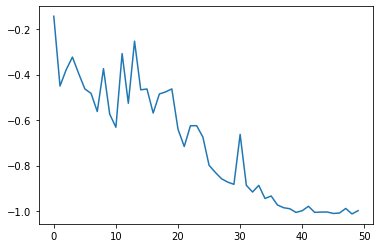

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(param.models[0].loss_history['gauss'])

In [20]:
param.models[0].training

False